In [13]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras import utils
import tensorflow as tf
import numpy as np
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
df = pd.read_csv('traff.csv', header=None)
df.head()

,0,1
0,1/1/2017,"22,226.00"
1,1/2/2017,"29,593.00"
2,1/3/2017,"31,726.00"
3,1/4/2017,"32,684.00"
4,1/5/2017,"31,820.00"


In [15]:
df[0] = pd.to_datetime(df[0], format='%m/%d/%Y')
df[1] = list(map(lambda x: float(x.replace(',','')), df[1]))

values = df[1].values
values = values.reshape((-1, 1))

scaler = StandardScaler()
scaled_values = scaler.fit_transform(values)

In [16]:
train, test = train_test_split(scaled_values, test_size=0.2, shuffle=False)

In [17]:
len = 3
batch_size = 10

generator = TimeseriesGenerator(train, train, length=len, sampling_rate=1, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test, test, length=len, sampling_rate=1, batch_size=batch_size)

model = Sequential()
model.add(LSTM(32, input_shape=(len, 1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(Dense(128, activation='linear'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=60, validation_data=validation_generator, verbose=1)

Epoch 1/60
88/88 [==============================] - 10s 29ms/step - loss: 0.3492 - val_loss: 0.3472
Epoch 2/60
88/88 [==============================] - 2s 20ms/step - loss: 0.1932 - val_loss: 0.3544
Epoch 3/60
88/88 [==============================] - 2s 18ms/step - loss: 0.1764 - val_loss: 0.2591
Epoch 4/60
88/88 [==============================] - 1s 12ms/step - loss: 0.1625 - val_loss: 0.2129
Epoch 5/60
88/88 [==============================] - 1s 13ms/step - loss: 0.1339 - val_loss: 0.6419
Epoch 6/60
88/88 [==============================] - 1s 12ms/step - loss: 0.1201 - val_loss: 0.1207
Epoch 7/60
88/88 [==============================] - 1s 13ms/step - loss: 0.0758 - val_loss: 0.1187
Epoch 8/60
88/88 [==============================] - 1s 13ms/step - loss: 0.0776 - val_loss: 0.1033
Epoch 9/60
88/88 [==============================] - 1s 13ms/step - loss: 0.0750 - val_loss: 0.1051
Epoch 10/60
88/88 [==============================] - 1s 12ms/step - loss: 0.0768 - val_loss: 0.1229
Epoch 11

22/22 [==============================] - 0s 12ms/step


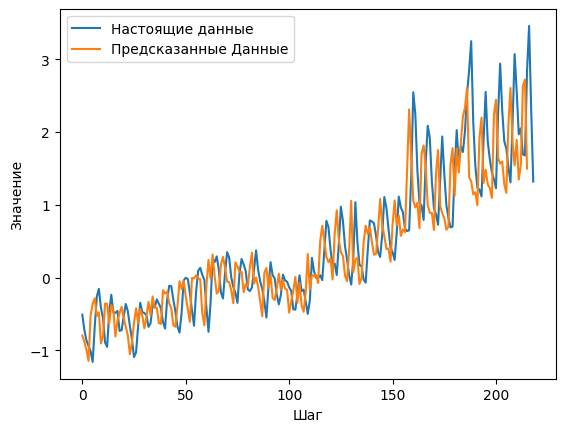

In [19]:
predicted = model.predict(validation_generator, verbose=True)

plt.figure()
plt.plot(test, label='Настоящие данные')
plt.plot(predicted, label='Предсказанные Данные')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()